# Advertising Budget and Sales Analysis Project

This project analyzes the relationship between advertising budgets across different media channels (TV, Radio, Newspaper) and their impact on sales. Using machine learning models, we aim to predict sales based on advertising spend.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df=pd.read_csv('Advertising Budget and Sales.csv')

In [9]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
df=df.drop("Unnamed: 0",axis=1)

In [11]:
df

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Data Analysis and Visualization

In this section, we perform exploratory data analysis (EDA) to understand:
1. The distribution of advertising budgets across different channels
2. Correlation between advertising spend and sales
3. Identify potential patterns and relationships in the data
4. Check for any outliers or anomalies that might affect our model

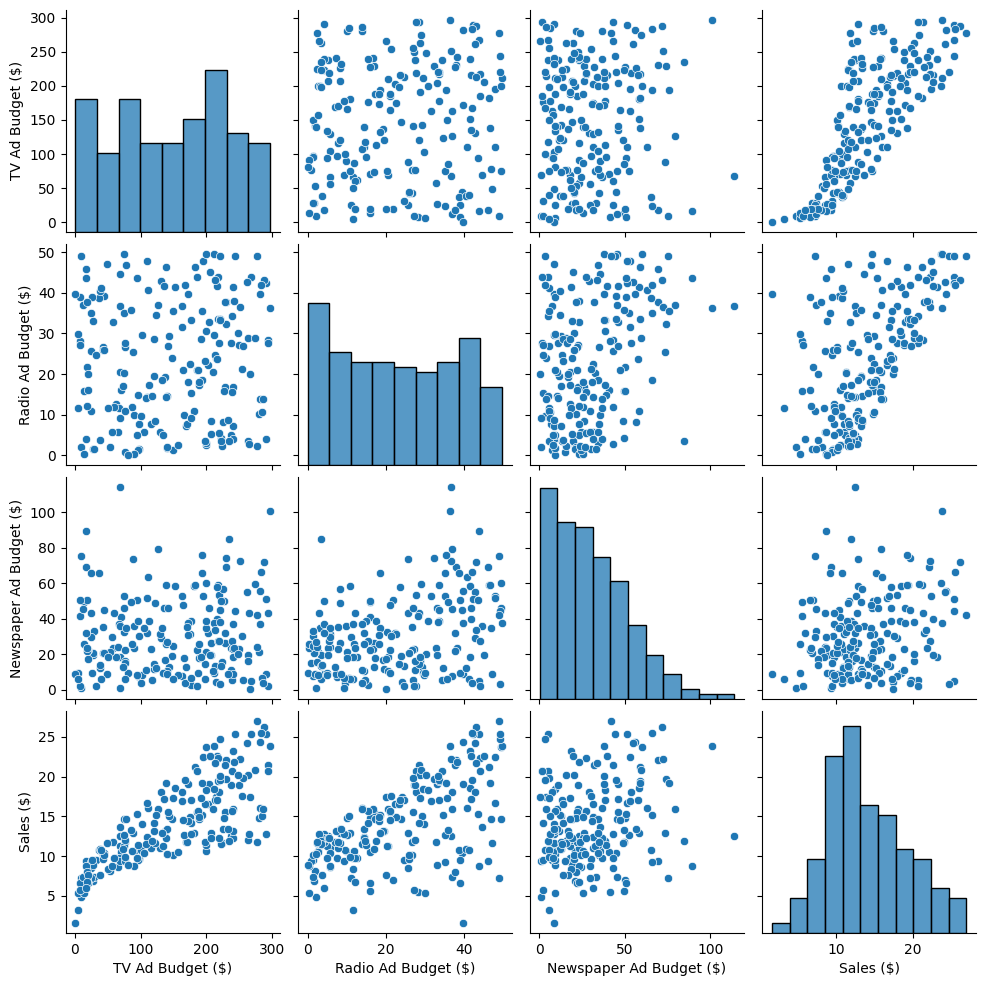

In [13]:
sns.pairplot(df)

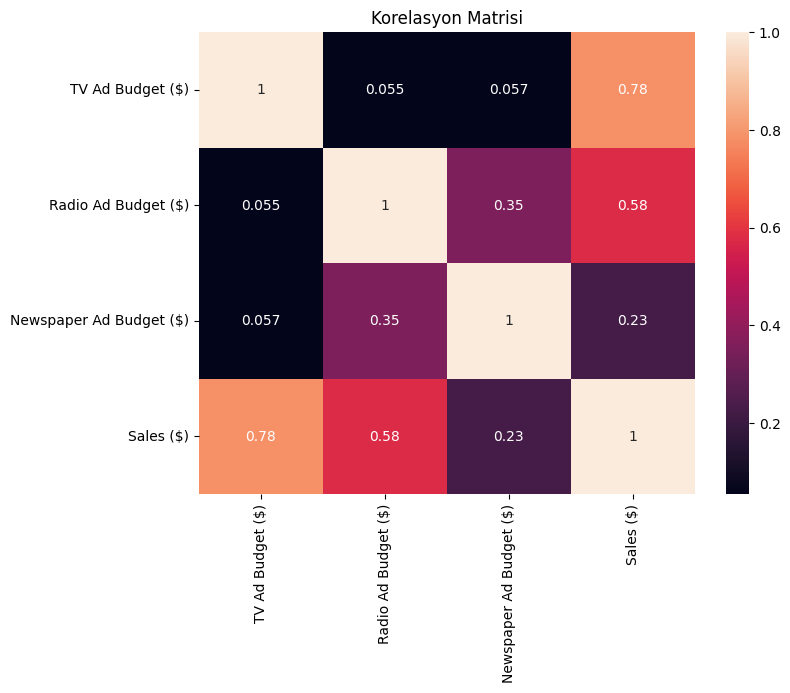

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True,)
plt.title("Korelasyon Matrisi")
plt.show()

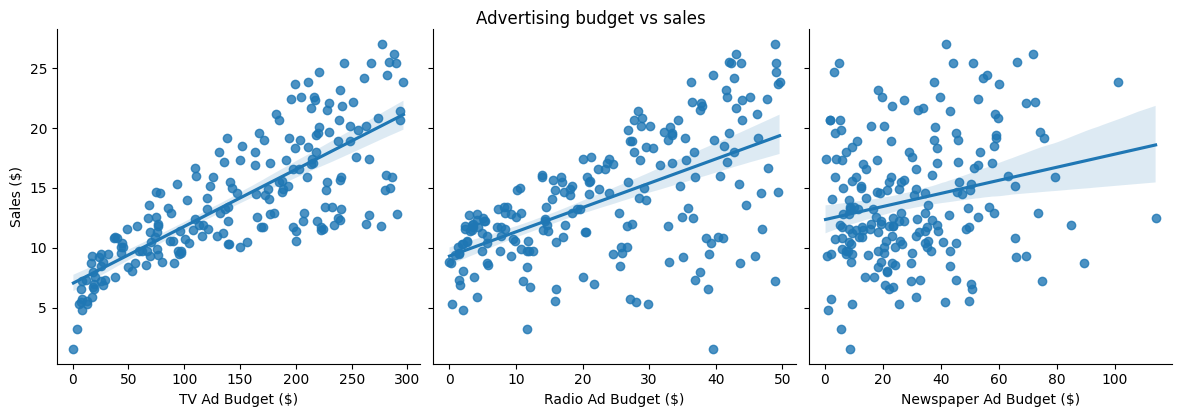

In [15]:
sns.pairplot(df, x_vars=["TV Ad Budget ($)", "Radio Ad Budget ($)", "Newspaper Ad Budget ($)"], 
             y_vars="Sales ($)", kind="reg",height=4  )
plt.suptitle("Advertising budget vs sales", y=1.02)
plt.show()

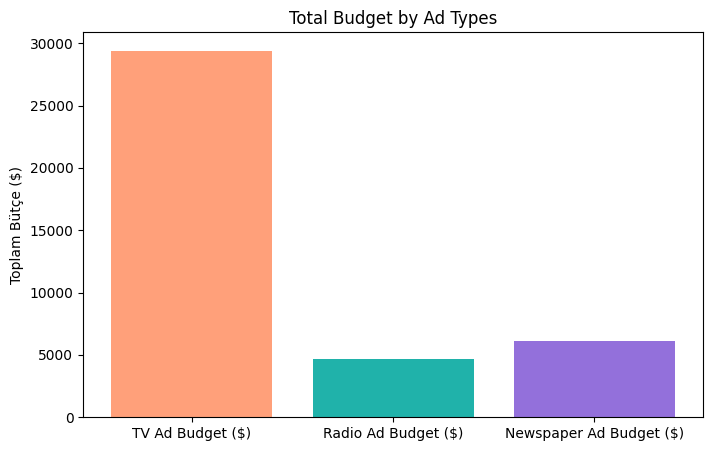

In [16]:

total_budget = df[["TV Ad Budget ($)", "Radio Ad Budget ($)", "Newspaper Ad Budget ($)"]].sum()

plt.figure(figsize=(8,5))
plt.bar(total_budget.index, total_budget.values, color=['#FFA07A','#20B2AA','#9370DB'])
plt.title("Total Budget by Ad Types")
plt.ylabel("Toplam Bütçe ($)")
plt.show()


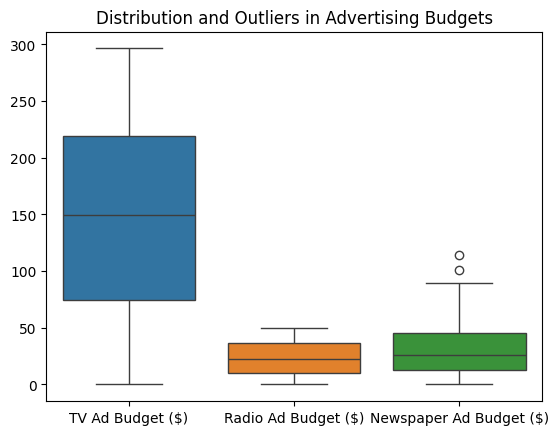

In [17]:
sns.boxplot(data=df[["TV Ad Budget ($)","Radio Ad Budget ($)","Newspaper Ad Budget ($)"]])
plt.title("Distribution and Outliers in Advertising Budgets")
plt.show()

In [18]:
## machine learning starts

# Machine Learning Model Development

We implement and compare different regression models:
1. Linear Regression: Basic model as baseline
2. Ridge Regression: To handle multicollinearity
3. Lasso Regression: For feature selection
4. ElasticNet: Combining L1 and L2 regularization

The models are evaluated using:
- R² Score: To measure the proportion of variance explained
- Scatter plots: To visualize prediction accuracy

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [20]:
X=df[["TV Ad Budget ($)","Radio Ad Budget ($)","Newspaper Ad Budget ($)"]]
y=df["Sales ($)"]

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)


In [22]:
scaler=StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

r2 score: 0.9042108940079047


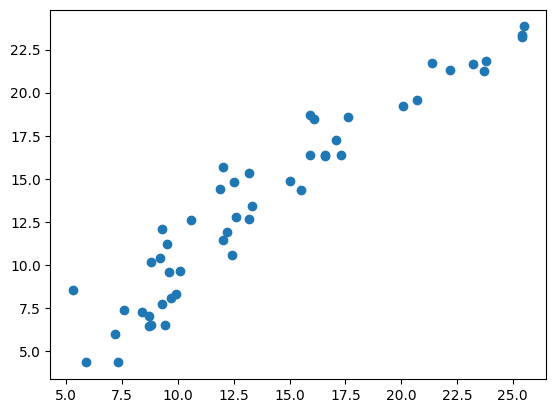

In [29]:
regression=LinearRegression()
regression.fit(X_train,y_train)
y_pred=regression.predict(X_test)
score=r2_score(y_test,y_pred)
plt.scatter(y_test,y_pred)
print("r2 score:",score)

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


r2 score: 0.9045352508223791


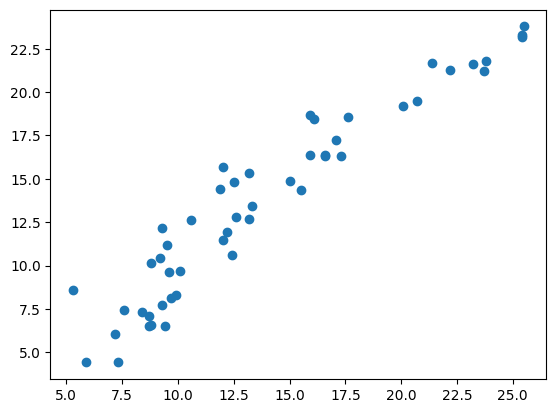

In [28]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
score=r2_score(y_test,y_pred)
plt.scatter(y_test,y_pred)
print("r2 score:",score)

r2 score: 0.8374396514137328


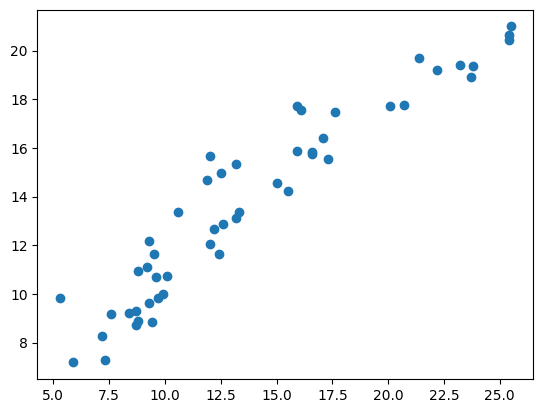

In [38]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
score=r2_score(y_test,y_pred)
plt.scatter(y_test,y_pred)
print("r2 score:",score)

r2 score: 0.7543620512690623


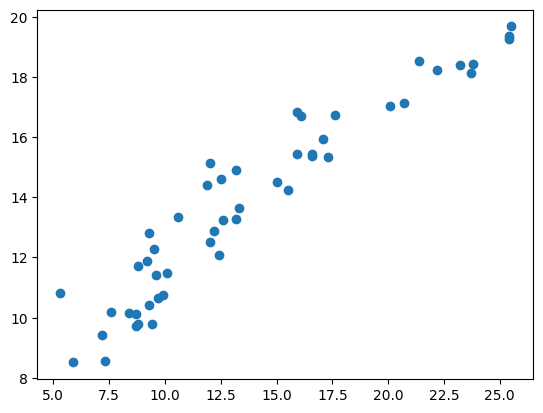

In [39]:
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
elasticnet.fit(X_train,y_train)
y_pred=elasticnet.predict(X_test)
score=r2_score(y_test,y_pred)
plt.scatter(y_test,y_pred)
print("r2 score:",score)

In [ ]:
# Model ve scaler'ı kaydet
import pickle

# Model ve scaler'ı kaydet
with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge, f)
    
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Results and Model Deployment

After comparing different models, Ridge Regression showed the best performance. Key advantages:
1. Better handling of multicollinearity between features
2. Prevents overfitting through L2 regularization
3. Maintains all features while reducing their impact appropriately

The final model is deployed using Streamlit for easy prediction of sales based on advertising budgets.